<a href="https://colab.research.google.com/github/LucasHornDaniel/colab/blob/main/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Primeiramente vamos importar o dataset referente ao AVC que foi repassado pelo professor no moodle.

In [ ]:
# [1] Entrada da base de dados
from google.colab import files
import pandas as pd 
import io 
%pylab inline


uploaded = files.upload()

AVCdata = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Saving brain_stroke.csv to brain_stroke (2).csv


In [ ]:
AVCdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
AVCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
from string import ascii_letters
import matplotlib.pyplot as plt
import seaborn as sns

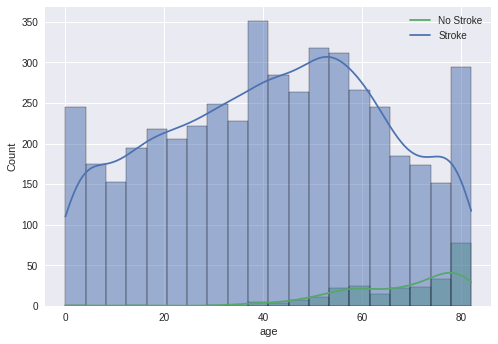

In [ ]:
plt.style.use('seaborn')
sns.histplot(data=AVCdata, x='age', hue='stroke' , kde=True)
plt.legend(['No Stroke','Stroke'])


###  1.1 Árvore de Decisão (DecisionTreeRegressor, DecisionTreeClassifier)

In [ ]:
AVCdataManipulado = AVCdata
target = AVCdata['stroke']

In [ ]:
from sklearn.preprocessing import LabelEncoder #transformação

In [ ]:
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_work_type = LabelEncoder()
le_residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()


In [ ]:
AVCdataManipulado['gender_n'] = le_gender.fit_transform(AVCdataManipulado['gender'])
AVCdataManipulado['married_n'] = le_married.fit_transform(AVCdataManipulado['ever_married'])
AVCdataManipulado['work_type_n'] = le_work_type.fit_transform(AVCdataManipulado['work_type'])
AVCdataManipulado['residence_type_n'] = le_residence_type.fit_transform(AVCdataManipulado['Residence_type'])
AVCdataManipulado['smoking_status_n'] = le_smoking_status.fit_transform(AVCdataManipulado['smoking_status'])


AVCdataManipulado.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,0,2
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,1,1,3
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,2,0,2
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,1,1,1


Agora dropos os dados qualitativos e deixamos somente os quantitativos para o uso do algoritmo
Os dados imputs_n serão usados em outros algoritmos



In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados!

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [ ]:
X = imputs_n.drop("stroke", axis=1)
y = imputs_n["stroke"]

Xtr, Xval, ytr, yval = train_test_split(X, y,test_size=0.5, random_state= 0)
#arvore = DecisionTreeRegressor(max_depth=1, random_state= 0) 
arvore = DecisionTreeClassifier(max_depth=1, random_state= 0) 

arvore.fit(Xtr, ytr)

p = arvore.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.21764772896154838

Vamos analisar em relação a profundidade se esse erro diminuiu conforme o numero do max_depth.





    **DecisionTreeRegressor**

*   none ->  0.2896585012916657 


*  d = 1 ->  0.20899920051082768


*   d = 2 -> 0.20966167717971654

*   d = 3 -> 0.2116931396562256

*   d = 4 -> 0.2139124365392641
*   d = 5 -> 0.21338365244305066

Percebemos que o melhor resultado foi o max_depth = 1

      **DecisionClassifier**


*   none -> 0.2917299829957891
*   d = 1 -> 0.21764772896154838


*   d = 2 -> 0.22490463655504803
*   d = 3 -> 0.22221107068678816


*   d = 4 -> 0.2240103799854561
*   d = 5 -> 0.22130593018046069

Percebemos que o melhor resultado foi o max_depth = 1



















Agora vamos ver o Gráfico referente a esse árvore
gráfico esta no final do **plot_tree**

[Text(0.5, 0.75, 'age <= 75.5\ngini = 0.099\nsamples = 2490\nvalue = [2360, 130]'),
 Text(0.25, 0.25, 'gini = 0.062\nsamples = 2236\nvalue = [2164, 72]'),
 Text(0.75, 0.25, 'gini = 0.352\nsamples = 254\nvalue = [196, 58]')]

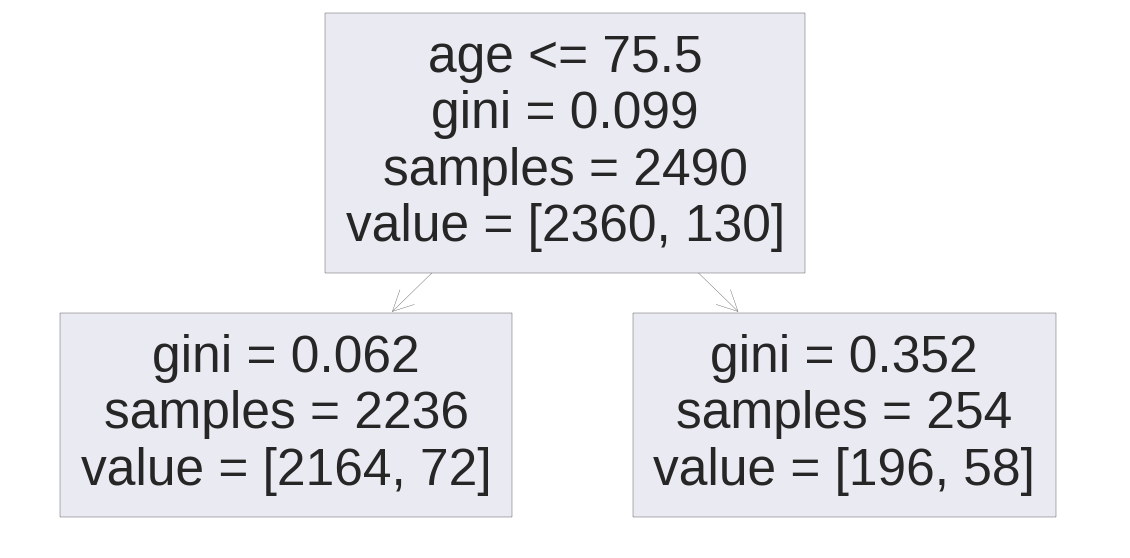

In [ ]:
pylab.figure(figsize=(20,10))
plot_tree(arvore, feature_names=Xtr.columns)

### 1.2 Support Vector Machine (padrão).

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

(<seaborn.axisgrid.PairGrid at 0x7f825c5deb90>,)

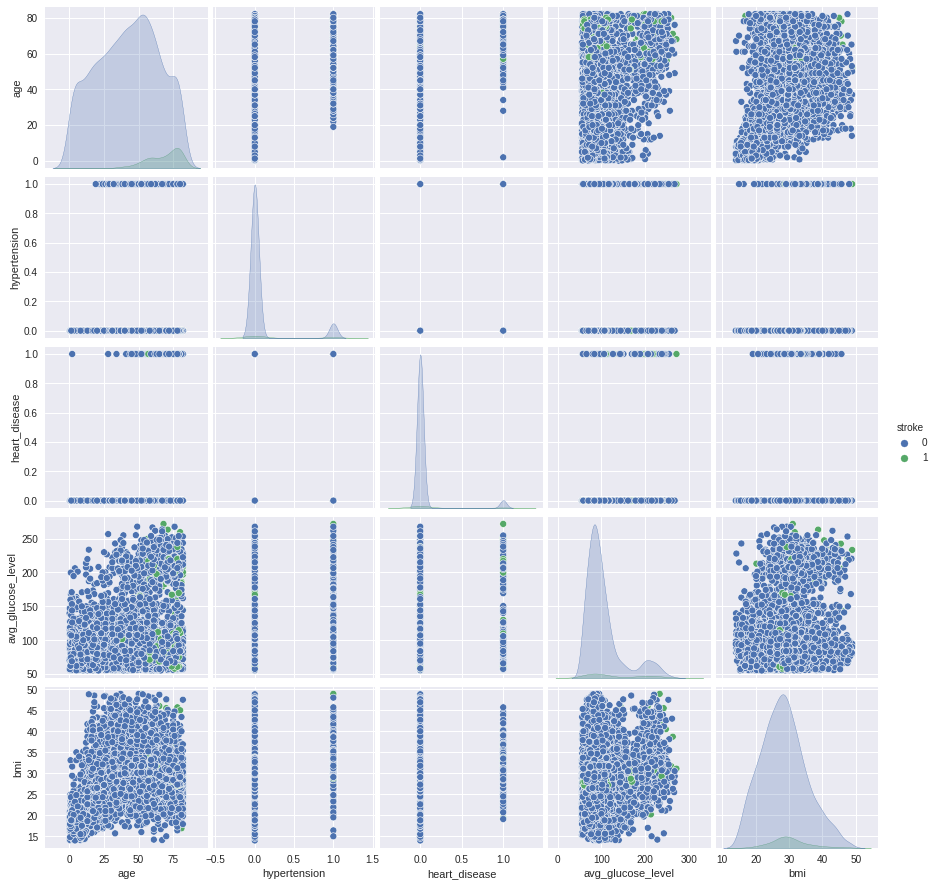

In [ ]:
sns.pairplot(AVCdata[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']], hue='stroke'), 

In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados!

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
imputs_n.shape
imputs_n.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1


*   Classificando o AVC dataset

In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=13)


In [ ]:
classificador = svm.SVC(C=1.0)

In [ ]:
classificador.fit(x_train, y_train)

SVC()

In [ ]:
classificador.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

1506    0
1214    0
683     0
1369    0
2036    0
       ..
2498    0
4457    0
1730    0
4294    0
4261    0
Name: stroke, Length: 1495, dtype: int64

In [ ]:
classificador.score(x_train, y_train)


0.9472174411933448

In [ ]:
classificador.score(x_test, y_test)

0.9571906354515051

### 1.3 Support Vector Machine (mudando o kernel por outro)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split


*   Classifica


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=13)

In [ ]:
classificador = svm.SVC(kernel='linear')

In [ ]:
classificador.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
classificador.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train

4472    0
1972    0
4803    1
1292    0
3362    0
       ..
153     1
866     0
2790    0
74      1
338     0
Name: stroke, Length: 3486, dtype: int64

In [ ]:
classificador.score(x_test, y_test)

0.9511705685618729

In [ ]:
classificador.score(x_train, y_train)

0.9497991967871486

###  1.4 KNN Padrão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
AVCdata.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,0,2
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,1,1,3
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,2,0,2
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,1,1,1


In [ ]:
AVCdataManipulado = AVCdata.drop(['ever_married', 'work_type', 'Residence_type'], axis = 1)


In [ ]:
AVCdataManipulado.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,1,1,1,1,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1,1,1,1,0,2
2,Female,49.0,0,0,171.23,34.4,smokes,1,0,1,1,1,3
3,Female,79.0,1,0,174.12,24.0,never smoked,1,0,1,2,0,2
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1,1,1,1,1,1


In [ ]:
AVCdataManipulado = pd.get_dummies(AVCdata, columns=['gender', 'smoking_status'])
AVCdataManipulado.drop(['ever_married','work_type','Residence_type'], axis=1, inplace=True)

In [ ]:
AVCdataManipulado.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n,gender_Female,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2,0,1,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3,1,0,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1,0,1,0,1,0,0


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(x_train)
print(f'Training accuracy = ', end = ' ')

accu = accuracy_score(y_train,y_train_pred)
print(f'Accuracy score is {accu}')

y_test_pred = knn.predict(x_test)
print(f'Testing accuracy = ', end = ' ')

accu = accuracy_score(y_test,y_test_pred)
print(f'Accuracy score is {accu}')

Training accuracy =  Accuracy score is 0.9500860585197934
Testing accuracy =  Accuracy score is 0.9404682274247491


### 1.5 KNN com o valor do K alterado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados!

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
imputs_n.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']


In [ ]:
rng = np.random.RandomState(0)

In [ ]:
X = rng.random_sample((10, 3))

In [ ]:
tree = KDTree(X, leaf_size=2) 

In [ ]:
dist, ind = tree.query(X[:1], k=3) 
print(ind)

[[0 3 1]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
knn = KNeighborsClassifier(2, algorithm='kd_tree')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [ ]:
y_train_pred = knn.predict(x_train)
print(f'Training accuracy = ', end = ' ')

accu = accuracy_score(y_train,y_train_pred)
print(f'Accuracy score is {accu}')

y_test_pred = knn.predict(x_test)
print(f'Testing accuracy = ', end = ' ')

accu = accuracy_score(y_test,y_test_pred)
print(f'Accuracy score is {accu}')

Training accuracy =  Accuracy score is 0.9558232931726908
Testing accuracy =  Accuracy score is 0.9478260869565217


## 1.6 KNN Mudando medida de distancia

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados!

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
X = rng.random_sample((10, 3))

In [ ]:
tree = KDTree(X, leaf_size=2) 

In [ ]:
dist, ind = tree.query(X[:1], k=3) 
print(ind)

[[0 3 1]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
knn = KNeighborsClassifier(weights='distance')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
y_train_pred = knn.predict(x_train)
print(f'Training accuracy = ', end = ' ')

accu = accuracy_score(y_train,y_train_pred)
print(f'Accuracy score is {accu}')

y_test_pred = knn.predict(x_test)
print(f'Testing accuracy = ', end = ' ')

accu = accuracy_score(y_test,y_test_pred)
print(f'Accuracy score is {accu}')

Training accuracy =  Accuracy score is 1.0
Testing accuracy =  Accuracy score is 0.9404682274247491


# 1.7 Gaussian Naive Bayes (padrão)





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados! como foi pedido no trabalho usando somente dados quantitativos.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
gnb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train_pred = gnb.predict(x_train)
print(f'Training accuracy = ', end = ' ')

accu = accuracy_score(y_train,y_train_pred)
print(f'Accuracy score is {accu}')

y_test_pred = gnb.predict(x_test)
print(f'Testing accuracy = ', end = ' ')

accu = accuracy_score(y_test,y_test_pred)
print(f'Accuracy score is {accu}')

Training accuracy =  Accuracy score is 0.8640275387263339
Testing accuracy =  Accuracy score is 0.8474916387959867


# 1.8 Categorical Naive Bayes Para dados qualitativos 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
AVCdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,1,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,0,2
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,1,1,3
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,2,0,2
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder #transformação

In [ ]:
imputs_n = AVCdata.drop(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], axis='columns')
imputs_n #dados da tabelas alterados!

,gender,ever_married,work_type,Residence_type,smoking_status,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,Male,Yes,Private,Urban,formerly smoked,1,1,1,1,1,1
1,Male,Yes,Private,Rural,never smoked,1,1,1,1,0,2
2,Female,Yes,Private,Urban,smokes,1,0,1,1,1,3
3,Female,Yes,Self-employed,Rural,never smoked,1,0,1,2,0,2
4,Male,Yes,Private,Urban,formerly smoked,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,No,Private,Rural,formerly smoked,0,1,0,1,0,1
4977,Male,Yes,Private,Urban,smokes,0,1,1,1,1,3
4978,Female,Yes,Govt_job,Rural,smokes,0,0,1,0,0,3
4979,Male,Yes,Private,Rural,smokes,0,1,1,1,0,3


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4, 100), (2, 100), (4,), (2,))

In [ ]:
rng = np.random.RandomState(1)

In [ ]:
x = rng.randint(5, size=(6, 100))

In [ ]:
y = np.array([1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
clf = CategoricalNB()

In [ ]:
 clf.fit(x, y)

CategoricalNB()

In [ ]:
print(clf.predict(x[2:3]))

[3]


# 1.9 Regressão Linear (quadrados mínimos).

In [ ]:
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados! como foi pedido no trabalho usando somente dados quantitativos.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

p = modelo.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, p)

0.04310364322344265

# 1.10 Perceptron

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 10,5
%matplotlib

Using matplotlib backend: agg


In [ ]:
imputs_n = AVCdataManipulado.drop(['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status'], axis='columns')
imputs_n #dados da tabelas alterados! como foi pedido no trabalho usando somente dados quantitativos.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,married_n,work_type_n,residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [ ]:
x = imputs_n.drop('stroke', axis=1)
y = imputs_n['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3486, 10), (1495, 10), (3486,), (1495,))

In [ ]:
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


print("Unique labels: {0}".format(np.unique(y)))

Unique labels: [0 1]


In [ ]:
x_train_std = x_train_std[:,[2, 3]]
x_test_std = x_test_std[:, [2, 3]]

In [ ]:
ppn = Perceptron(eta0=0.1, n_iter_no_change=40, random_state=20)

In [ ]:
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, n_iter_no_change=40, random_state=20)

In [ ]:
y_pred = ppn.predict(x_test_std)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("accuracy: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

accuracy: 82.88%
